<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Types-of-Features/EDA_Functions_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# This is the Ames data after the week 5 cleaning steps (still has null values)
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/Prepped-ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,...,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice,Month,Year,Total Half Baths,Total Full Baths
0,907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,...,TA,TA,Y,MnPrv,03-2006,119900.0,3,2006,0.0,1.0
1,527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,...,TA,TA,Y,NaN,03-2006,320000.0,3,2006,1.0,3.0
2,534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,...,TA,TA,Y,NaN,04-2007,151500.0,4,2007,0.0,1.0
3,528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,...,TA,TA,Y,NaN,06-2008,385000.0,6,2008,0.0,3.0
4,533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,...,TA,TA,Y,NaN,02-2007,193800.0,2,2007,0.0,3.0


In [25]:
#Setting PID as the index
df = df.set_index("PID")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

## Make a Temporary Copy of the Dataframe for EDA

In [26]:
# Copy of dataframe just for visualization and EDA
temp_df = df.copy()

## Fill in missing values with a placeholder

In [27]:
# Let's start with Alley
x = "Alley"
placeholder = "Missing"
# In our temporatory df, we will fill in the missing values in the Alley column with the placeholder, MISSING
temp_df[x] = temp_df[x].fillna(placeholder)

## Making a Countplot

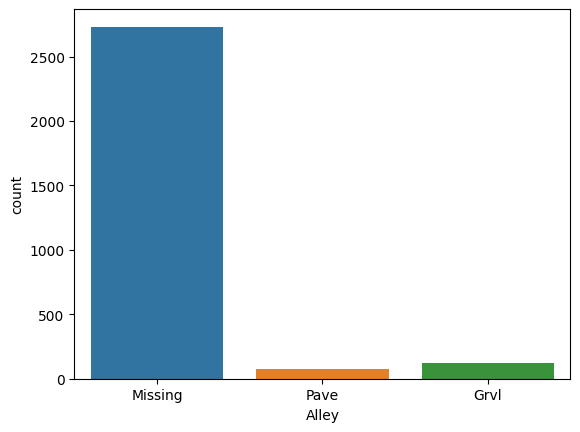

In [28]:
# Plotting a count plot 
sns.countplot(temp_df, x=x);

## Customize the Plot

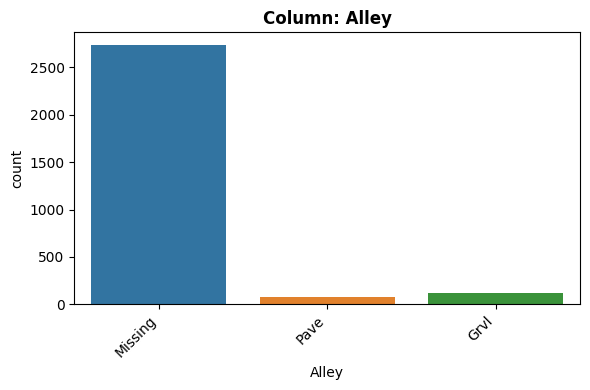

In [29]:
# Create figure with desired figsize
fig, ax = plt.subplots(figsize=(6,4))
# Plotting a count plot 
sns.countplot(temp_df, x=x, ax=ax)
# Rotate Tick Labels for long names
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Add a title with the feature name included
ax.set_title(f"Column: {x}", fontweight="bold")
fig.tight_layout();

In [36]:
def explore_categorical(df, x, fillna=True, placeholder = "Missing"):
    #Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # Fill in missing values with placeholder
    temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=(6,4))
    # Plotting a count plot 
    sns.countplot(temp_df, x=x, ax=ax)
    # Rotate Tick Labels for long names
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"Column: {x}");
    fig.tight_layout()

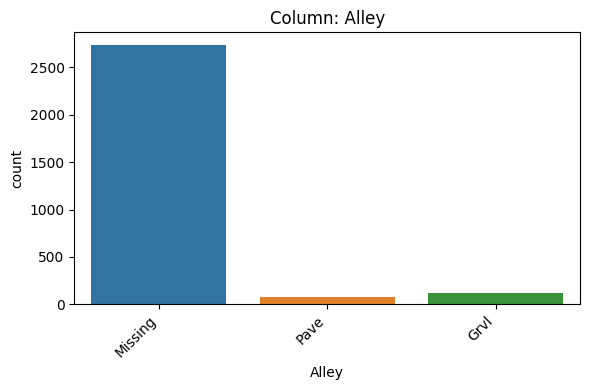

In [37]:
# Test our function on Alley
explore_categorical(df, "Alley");

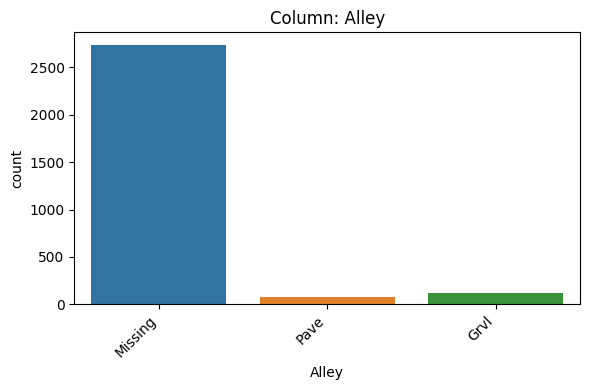

In [38]:
#Trying a different placeholder than default of "Missing"
explore_categorical(df, "Alley", placeholder="NA")

## Include Keyword Argument for fillna



In [40]:
def explore_categorical(df, x, fillna=True, placeholder="Missing"):
    # Make a copy of the dataframe and fillna 
    temp_df = df.copy()
    # fill NA with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=(6,4))
        # Plotting a count plot 
        sns.countplot(temp_df, x, ax=ax)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}");
        fig.tight_layout()

In [41]:
#Using custom function to 
explore_categorical(df, "Alley", fillna=False)